In [9]:
import pandas as pd
import numpy as np

#data=pd.read_csv('asc.csv')
data = pd.read_csv('asc.csv', names=['Location', 'Year', 'Month', 'Value'])


# Assuming 'values' is a list of the data points you provided
values = [data]  # You would replace this with your actual data

# Perform the FFT
fft_result = np.fft.fft(values)

# Get the power spectrum (squared magnitude of the FFT result)
power_spectrum = np.abs(fft_result)**2

# Compute the frequency axis (assuming a sampling rate 'fs')
fs = 1  # Sampling rate, the number of measurements per time unit
n = len(values)
freq = np.fft.fftfreq(n, d=1/fs)

# Now, 'fft_result' contains the FFT results,
# 'power_spectrum' contains the power of each frequency,
# and 'freq' contains the corresponding frequencies.

#print(fft_result)
print(data)

ValueError: complex() arg is a malformed string

In [13]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

def calculate_fft_frequencies(signal, sampling_rate=12):
    # Perform the FFT
    fft_result = np.fft.fft(signal)
    # Calculate the power spectrum
    power_spectrum = np.abs(fft_result)**2
    # Calculate the frequency bins
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    # Find the peaks in the power spectrum
    peak_indices, _ = find_peaks(power_spectrum)
    # Get the actual frequencies corresponding to the peak indices
    peak_freqs = freqs[peak_indices]
    # Sort the peaks in descending order of power and return the frequencies
    sorted_peak_freqs = peak_freqs[np.argsort(power_spectrum[peak_indices])[::-1]]
    return sorted_peak_freqs


#data=pd.read_csv('asc.csv')
data = pd.read_csv('asc.csv', names=['Location', 'Year', 'Month', 'Value'])


# Assuming 'values' is a list of the data points you provided
values = [data]  # You would replace this with your actual data


print(calculate_fft_frequencies(values,12))

# Example usage:
# signal = df['Value'].values  # The signal would be the 'Value' column from your DataFrame
# sampling_rate = ...  # You need to provide the sampling rate based on your data's time intervals
# peak_frequencies = calculate_fft_frequencies(signal, sampling_rate)
# print(peak_frequencies)


ValueError: complex() arg is a malformed string

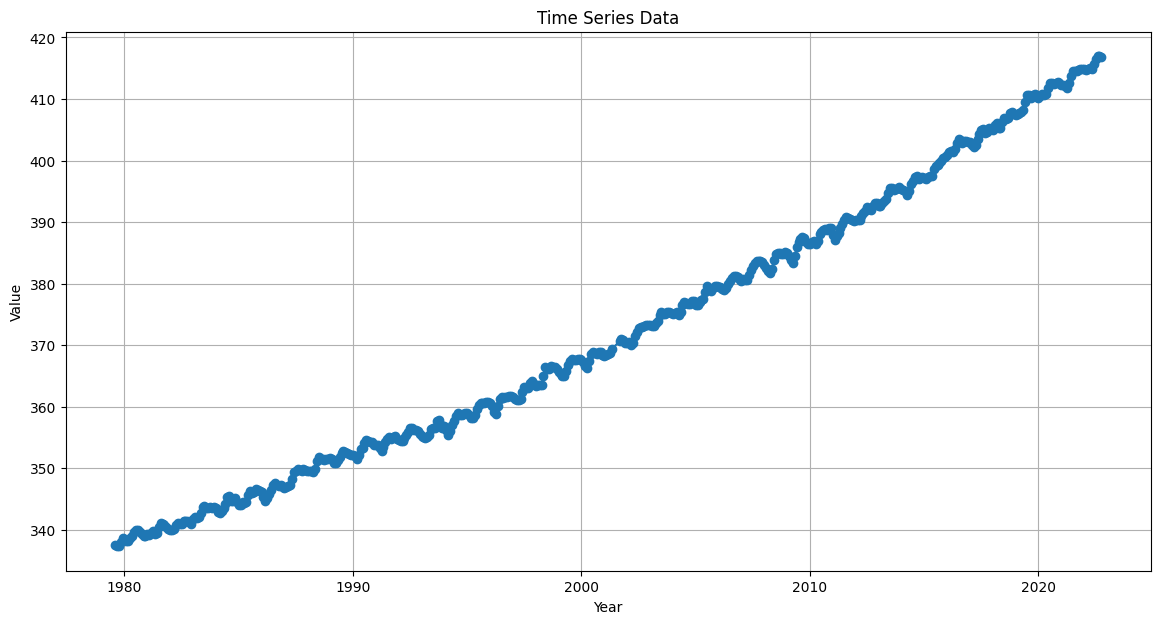

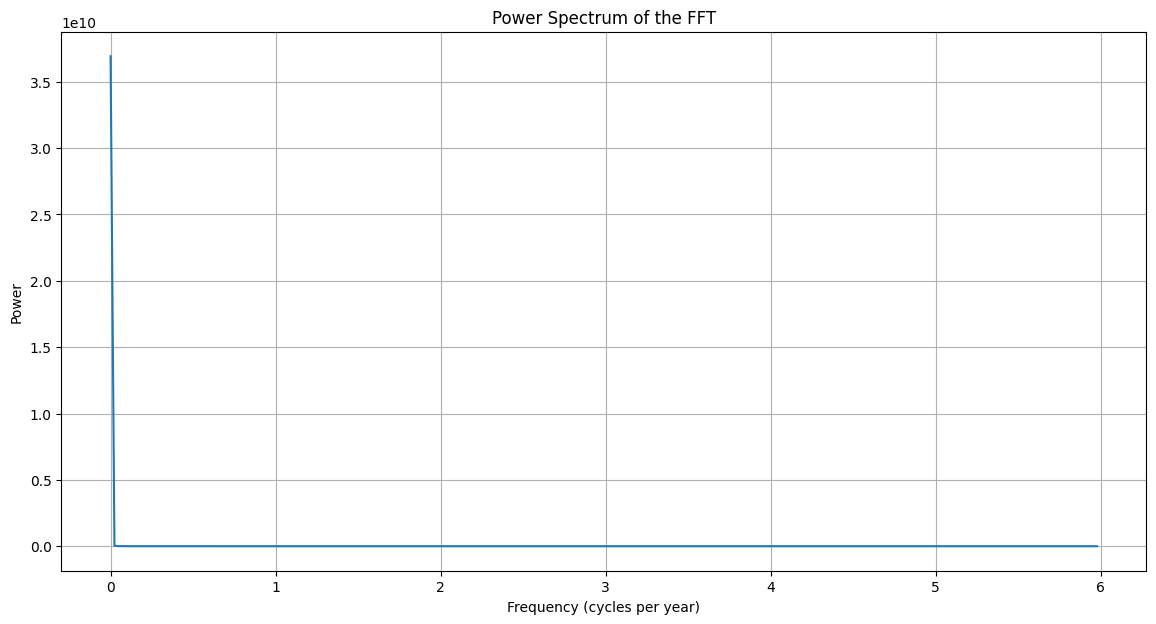

In [15]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

#data = pd.read_csv('asc.csv', names=['Location', 'Year', 'Month', 'Value'])


# Function to calculate FFT frequencies and find peaks
def calculate_fft_frequencies(signal, sampling_rate):
    fft_result = np.fft.fft(signal)
    power_spectrum = np.abs(fft_result)**2
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    peak_indices, _ = find_peaks(power_spectrum)
    peak_freqs = freqs[peak_indices]
    sorted_peak_freqs = peak_freqs[np.argsort(power_spectrum[peak_indices])[::-1]]
    return sorted_peak_freqs, power_spectrum, freqs

# Read the CSV file
df = pd.read_csv('asc.csv')#, names=['Location', 'Year', 'Month', 'Value'])


# Split the 'Location Year Month Value' column into separate columns and convert types
df_expanded = df['Location Year  Month   Value'].str.split(expand=True)
df_expanded.columns = ['Location', 'Year', 'Month', 'Value']
df_expanded['Year'] = df_expanded['Year'].astype(int)
df_expanded['Month'] = df_expanded['Month'].astype(int)
df_expanded['Value'] = df_expanded['Value'].astype(float)

# Calculate the FFT on the 'Value' column
signal = df_expanded['Value'].values
sampling_rate = 12  # Monthly data, hence 12 samples per year
peak_frequencies, power_spectrum, freqs = calculate_fft_frequencies(signal, sampling_rate)

# Add a 'Date' column to the DataFrame for plotting
df_expanded['Date'] = df_expanded['Year'] + (df_expanded['Month'] - 1) / 12

# Plot the original time series data
plt.figure(figsize=(14, 7))
plt.plot(df_expanded['Date'], df_expanded['Value'], marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot the power spectrum of the FFT
half_n = len(freqs) // 2
plt.figure(figsize=(14, 7))
plt.plot(freqs[:half_n], power_spectrum[:half_n])
plt.title('Power Spectrum of the FFT')
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Power')
plt.grid(True)
plt.show()


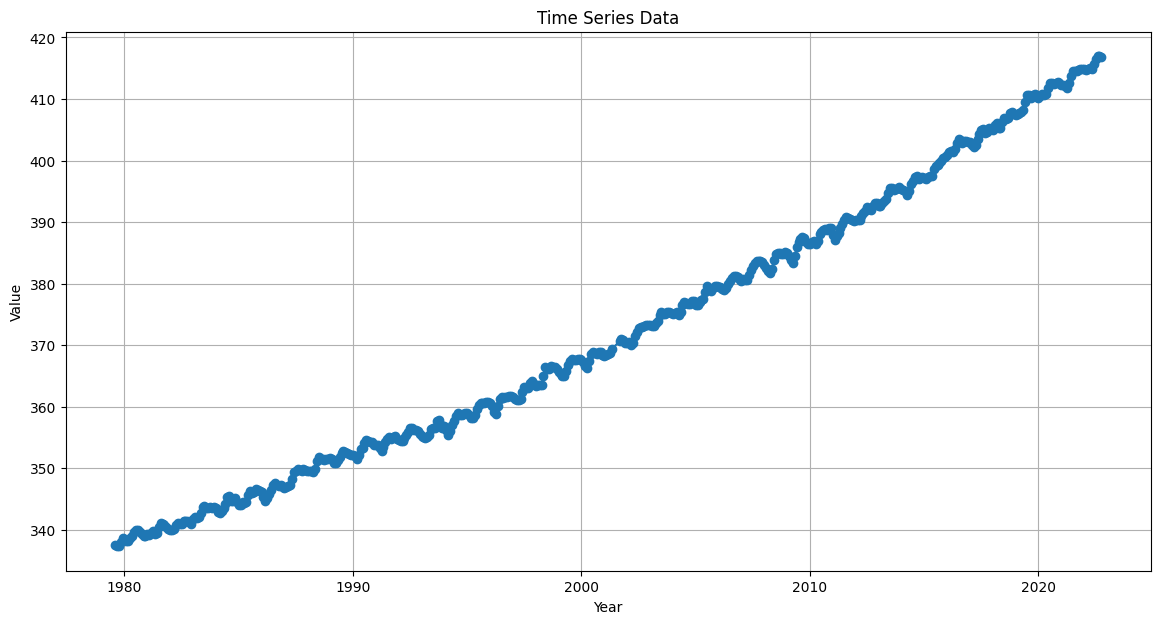

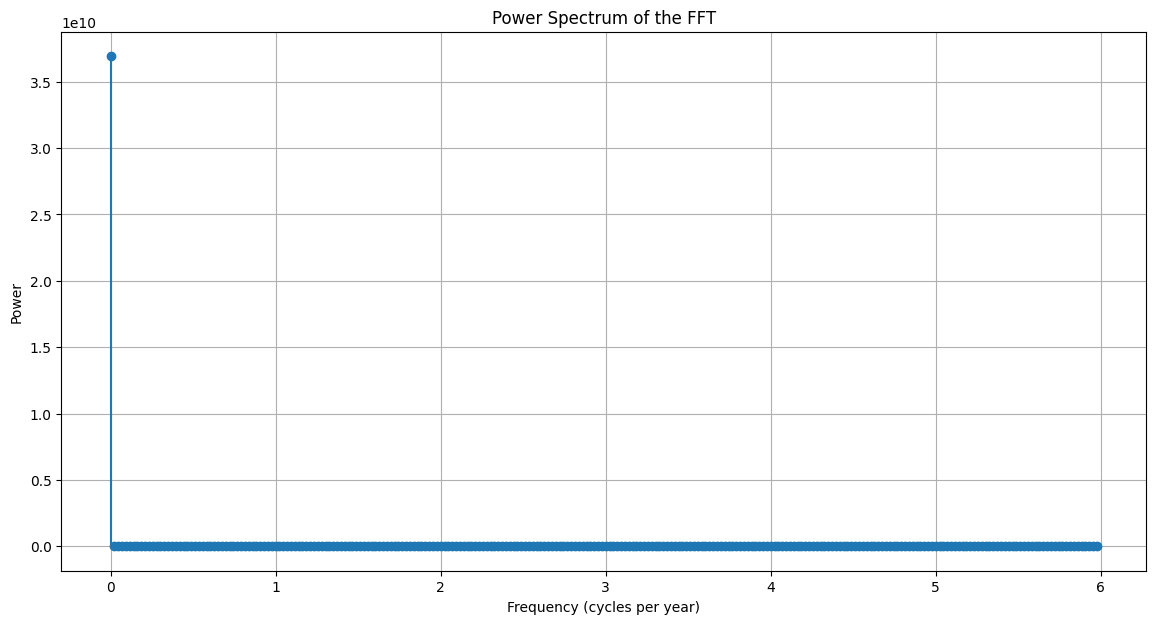

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Function to calculate FFT frequencies and find peaks
def calculate_fft_frequencies(signal, sampling_rate):
    fft_result = np.fft.fft(signal)
    power_spectrum = np.abs(fft_result)**2
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    peak_indices, _ = find_peaks(power_spectrum)
    peak_freqs = freqs[peak_indices]
    sorted_indices = np.argsort(power_spectrum[peak_indices])[::-1]
    sorted_peak_freqs = peak_freqs[sorted_indices]
    sorted_peak_powers = power_spectrum[peak_indices][sorted_indices]
    return sorted_peak_freqs, sorted_peak_powers, freqs, power_spectrum

# Read the CSV file
df = pd.read_csv('asc.csv', delim_whitespace=True)

# Calculate the FFT on the 'Value' column
signal = df['Value'].values
sampling_rate = 12  # Monthly data, hence 12 samples per year
peak_frequencies, peak_powers, freqs, power_spectrum = calculate_fft_frequencies(signal, sampling_rate)

# Add a 'Date' column to the DataFrame for plotting
df['Date'] = df['Year'] + (df['Month'] - 1) / 12

# Plot the original time series data
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Value'], marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot the power spectrum of the FFT
half_n = len(freqs) // 2
plt.figure(figsize=(14, 7))
plt.stem(freqs[:half_n], power_spectrum[:half_n], basefmt=" ")
plt.title('Power Spectrum of the FFT')
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Power')
plt.grid(True)
plt.show()
